In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')


## Dataset Overview


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
633,ham,Got it. Seventeen pounds for seven hundred ml ...,NaN,NaN,NaN
429,ham,I wnt to buy a BMW car urgently..its vry urgen...,NaN,NaN,NaN
799,ham,"\Gimme a few\"" was &lt;#&gt; minutes ago""",NaN,NaN,NaN
2896,ham,ÌÏ collecting ur laptop then going to configur...,NaN,NaN,NaN
4314,ham,Captain is in our room:),NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning (Structural)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
178,ham,Text her. If she doesnt reply let me know so i...
956,ham,"Love isn't a decision, it's a feeling. If we c..."
4779,ham,Sen told that he is going to join his uncle fi...
2012,ham,Beautiful Truth against Gravity.. Read careful...
5099,ham,"Ah, well that confuses things, doesnt it? I th..."


In [8]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [9]:
df.sample(5)

,target,message
5535,ham,"I know you are thinkin malaria. But relax, chi..."
4739,ham,"I keep seeing weird shit and bein all \woah\"" ..."
1667,ham,So now my dad is gonna call after he gets out ...
4764,ham,if you text on your way to cup stop that shoul...
1288,ham,Happy new year to u too!


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

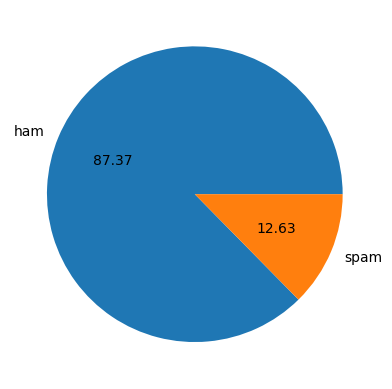

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

### Class Distribution

**Observations:**
- The dataset is highly imbalanced, with approximately 87% ham messages and 13% spam messages.
- This imbalance indicates that accuracy alone will not be a reliable evaluation metric.
- Special attention will be required during model evaluation, focusing on precision, recall, and F1-score rather than accuracy.


In [18]:
import nltk

In [19]:
df['num_characters']=df['message'].apply(len)

In [20]:
df.head()

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,target,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


### Statistical Summary (Overall Dataset)

**Observations:**
- The average message length is approximately 79 characters and 18 words.
- The dataset contains messages with significant variation in length, as indicated by large standard deviations.
- The presence of very long messages (up to 910 characters) suggests potential outliers.
- Length-based features exhibit skewed distributions, motivating the use of robust text preprocessing.


In [26]:
df[df['target']==0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [27]:
df[df['target']==1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


### Comparative Insights

- Spam messages are consistently longer than ham messages across all length-based metrics.
- While length-based features show clear trends, overlapping ranges indicate that they are insufficient for perfect separation.
- These findings motivate the use of advanced text representations such as TF-IDF or word embeddings in subsequent stages.


In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

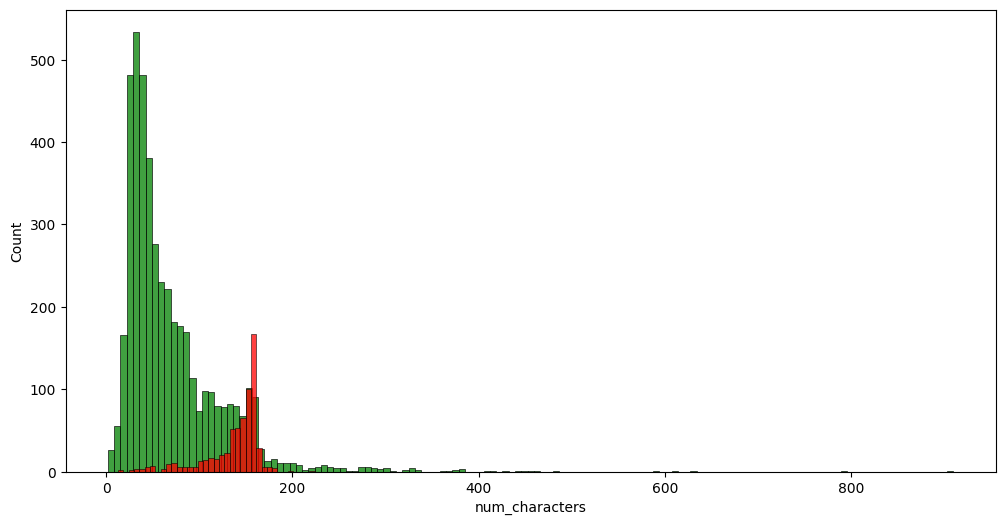

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

### Message Length (Characters) – Spam vs Ham

**Observations:**
- Ham messages are mostly concentrated at lower character counts, indicating that normal conversations tend to be short.
- Spam messages generally have higher character counts and show a wider spread.
- There is an overlap between spam and ham distributions, but longer messages are more likely to be spam.
- Message length in terms of characters appears to be a useful discriminative feature, though not sufficient on its own.


<Axes: xlabel='num_words', ylabel='Count'>

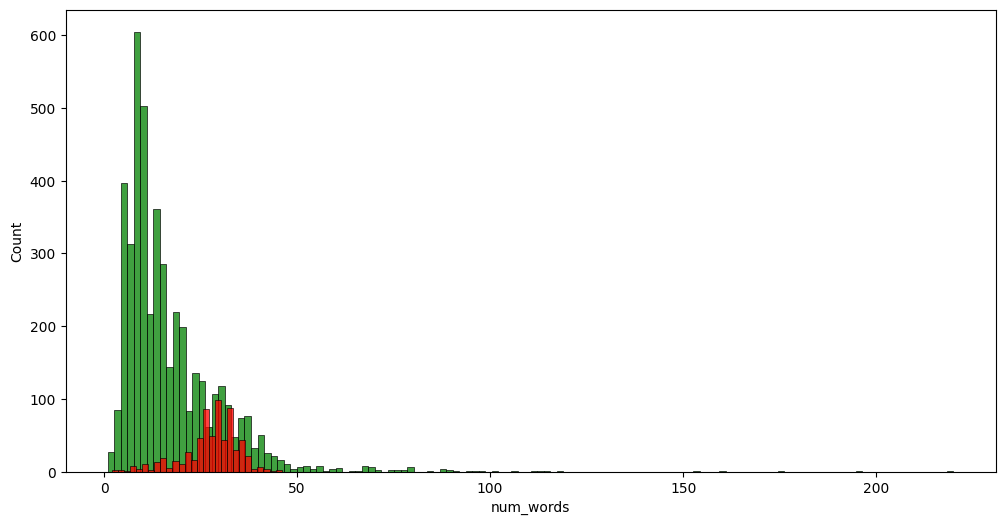

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='red')

### Message Length (Words) – Spam vs Ham

**Observations:**
- Ham messages typically contain fewer words and are densely clustered at lower word counts.
- Spam messages tend to have higher word counts, suggesting promotional or informational content.
- Significant overlap exists between the two classes, indicating that word count alone cannot perfectly separate spam and ham.
- Word count can serve as a supportive feature when combined with other text-based features.


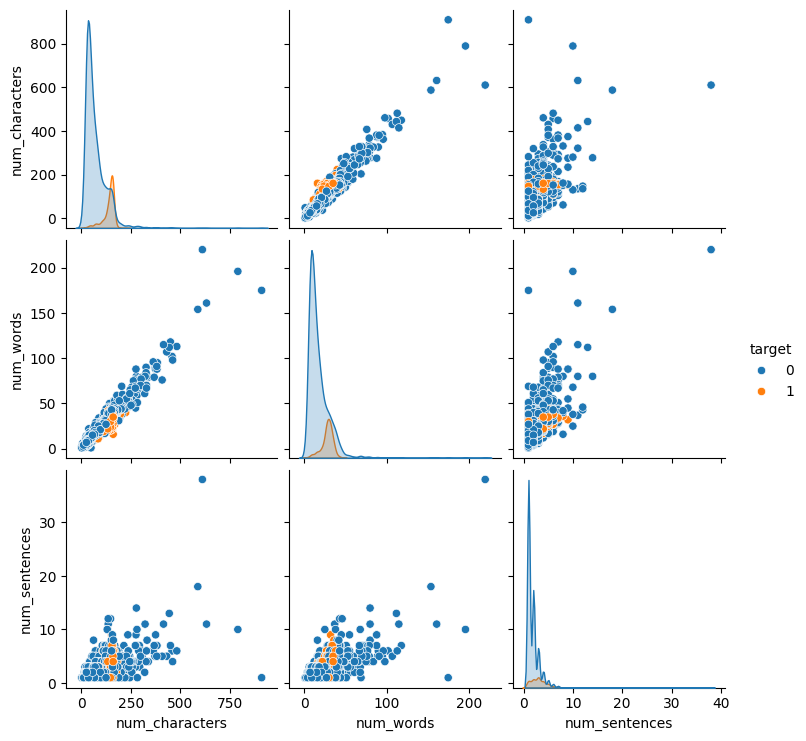

In [31]:
sns.pairplot(df,hue='target')

### Pairwise Feature Relationships (Spam vs Ham)

**Observations:**
- Strong linear relationships are observed between `num_characters`, `num_words`, and `num_sentences`, confirming high inter-correlation among length-based features.
- Spam messages (target = 1) generally occupy regions with higher values across all three length features.
- Despite this trend, there is significant overlap between spam and ham classes, indicating that these features alone do not provide clear separation.
- The pairwise plots reinforce that length-based features are informative but redundant, and should be complemented with text-based vector features for effective classification.


<Axes: >

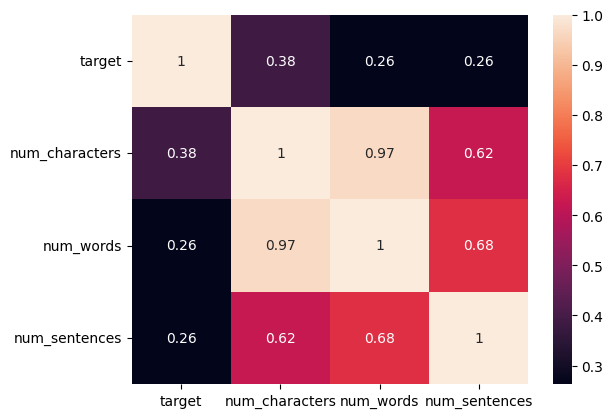

In [32]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True)


### Observations
- Message length features (characters, words, sentences) are highly correlated with each other.
- Spam messages tend to have higher length-related values.
- Correlation with target is moderate, indicating these features alone are not sufficient for classification.

## Data Preprocessing
The raw SMS text is cleaned and normalized using the following steps:
- Conversion to lowercase
- Tokenization of text into words
- Removal of non-alphanumeric tokens
- Removal of English stopwords
- Stemming using Porter Stemmer



Based on insights from the exploratory data analysis, text preprocessing is applied to prepare 
the messages for feature extraction and modeling.


In [33]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
def transform_text(text):
    text = text.lower()
    text=nltk.word_tokenize(text)
    y = []
    for i in text:
         if i.isalnum():
             y.append(i)
    text = y[:]
    y.clear()

    for i in  text:
        if i not in stopwords.words('english') and i not in string.punctuation:
             y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y) 

In [35]:
df['transformed_text']=df['message'].apply(transform_text)

In [36]:
df.head()

,target,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white',max_words=300)

In [38]:
spam_w=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

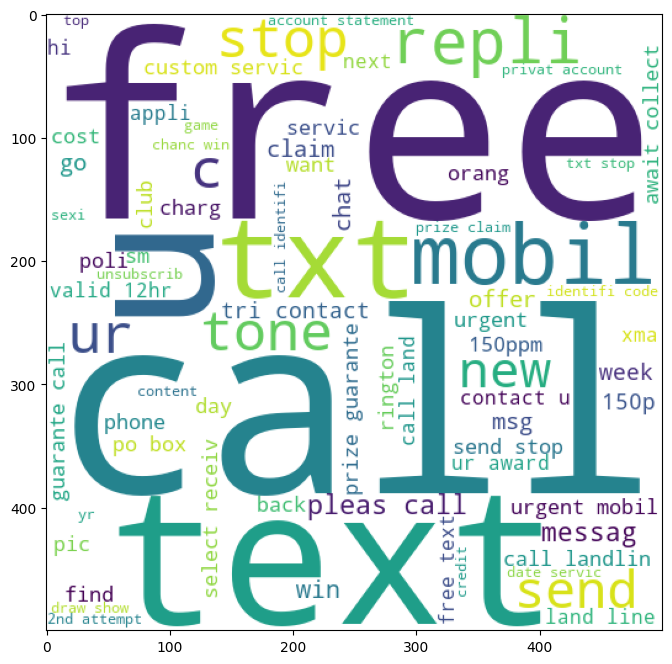

In [39]:
plt.figure(figsize=(15,8))
plt.imshow(spam_w)

The word cloud below highlights the most frequent terms appearing in spam messages.

In [40]:
ham_w=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

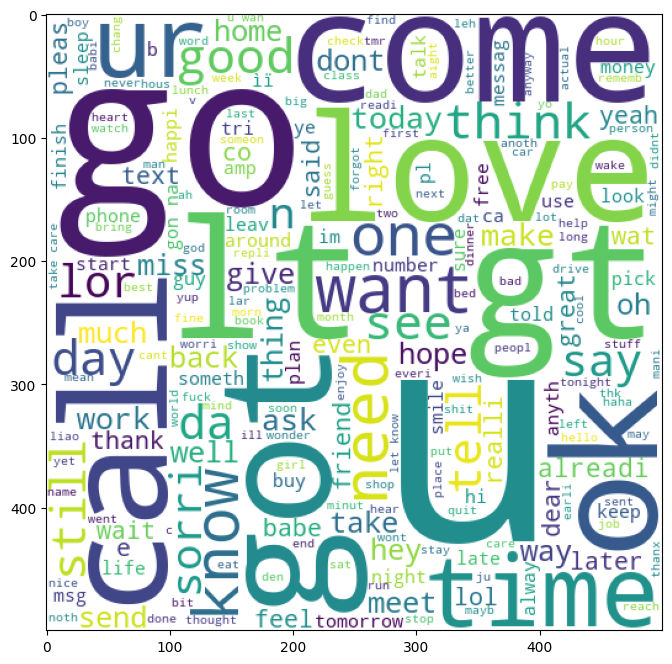

In [41]:
plt.figure(figsize=(15,8))
plt.imshow(ham_w)

The word cloud below represents commonly used words in non-spam (ham) messages.

In [42]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

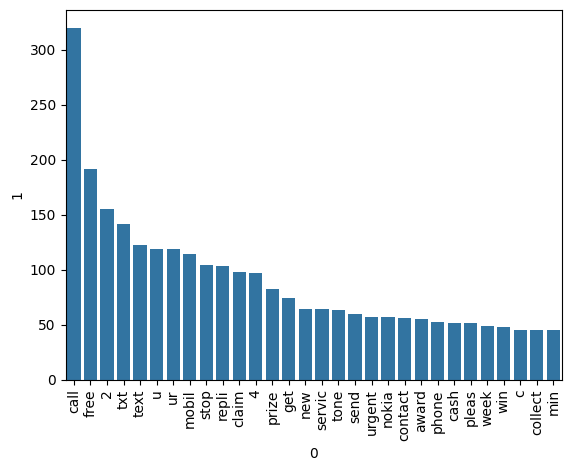

In [44]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [46]:
len(ham_corpus)

35404

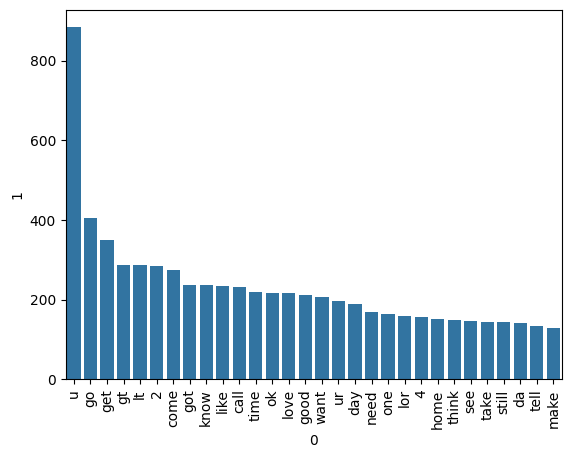

In [47]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Bar charts are used to visualize the top 30 most frequent words in spam and ham messages,
providing a clearer quantitative comparison beyond word clouds.